# Load the dataset

In [1]:
#import the libraries

import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# load the image data
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Pre-process the data

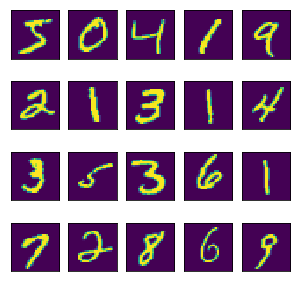

In [4]:
fig = plt.figure(figsize=(5,5))

for i in range(1,21):
    fig.add_subplot(4, 5, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i-1])
    
plt.show()

In [5]:
# pre-process the data
num_classes = 10

# convert the labels to one-hot-encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# reshape to (rows, columns, channels)
x_test_copy = x_test.copy()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Define the Neural Network Architecture

In [6]:
# define your neural network architecture

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten

input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2769408   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 2,774,858
Trainable params: 2,774,858
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.1674 - acc: 0.9503
Epoch 2/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0659 - acc: 0.9799
Epoch 3/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0478 - acc: 0.9848
Epoch 4/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0382 - acc: 0.9878
Epoch 5/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0325 - acc: 0.9895
Epoch 6/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0277 - acc: 0.9907: 1s - loss: 0.0276 - acc:
Epoch 7/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0204 - acc: 0.9937
Epoch 8/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0170 - acc: 0.9946
Epoch 9/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0166 - acc: 0.9946
Epoch 10/10
60000/60000 [==============================] - 71s 1ms/step -

# Evaluate the model

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0733153719666945
Test accuracy: 0.9821


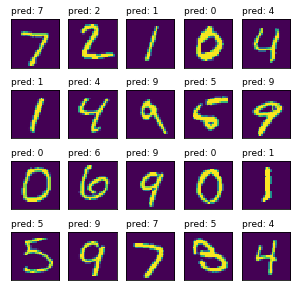

In [10]:
y_pred = model.predict_classes(x_test[0:20])

fig = plt.figure(figsize=(5,5))

for i in range(1,21):
    fig.add_subplot(4, 5, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_copy[i-1])
    
    plt.title("pred: %s" % (y_pred[i-1]),  fontsize=9, loc='left')
    
plt.show()